In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import time
import pandas as pd
import cx_Oracle

from IPython import display

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
con = cx_Oracle.connect('open_source/1111@localhost:1521/xe')
cur = con.cursor()

In [3]:
cur.execute('select * from weather')

columns = ['DATE_TIME','NX', 'NY', '기온', '시간1_강수량', '강수형태',
                         '습도', '풍속', '풍향', '동서바람성분', '남북바람성분']
df = pd.DataFrame(cur,columns=columns)

df

,DATE_TIME,NX,NY,기온,시간1_강수량,강수형태,습도,풍속,풍향,동서바람성분,남북바람성분
0,2022-12-28 10:00:00,58.0,125.0,0.0,0.0,-2.8,60.0,3.0,250.0,2.8,-0.8
1,2022-12-28 11:00:00,58.0,125.0,0.0,0.0,-1.8,65.0,13.0,270.0,3.8,0.8


In [4]:
def plt_update(ax):

    ax.plot(df['DATE_TIME'],df['기온'])
    ax.plot(df['DATE_TIME'],df['시간1_강수량'])
    ax.plot(df['DATE_TIME'],df['강수형태'])
    ax.plot(df['DATE_TIME'],df['습도'])
    ax.plot(df['DATE_TIME'],df['풍속'])
    ax.plot(df['DATE_TIME'],df['풍향'])
    ax.plot(df['DATE_TIME'],df['동서바람성분'])
    ax.plot(df['DATE_TIME'],df['남북바람성분'])
    hdisplay.update(fig)


In [5]:
plot_list = ['기온','시간1_강수량', '강수형태','습도', '풍속','풍향', '동서바람성분', '남북바람성분']

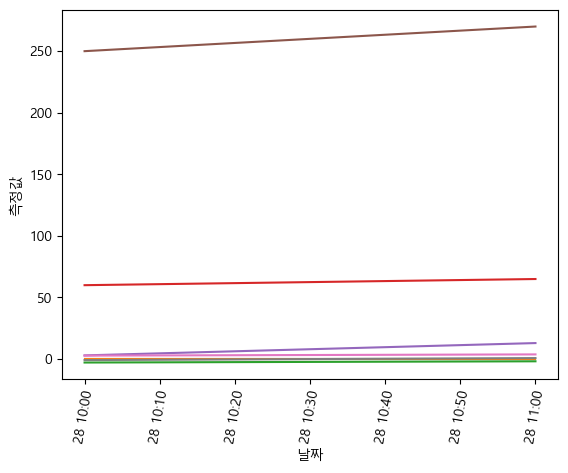

In [6]:
fig,ax = plt.subplots(1,1)
plt.xticks(rotation=80)
hdisplay = display.display("", display_id=True)

ax.set_xlabel('날짜')
ax.set_ylabel('측정값')

plt_update(ax)

# for f in range(1):
#     plt_update(ax)
#     time.sleep(1)

plt.close()